In [2]:
#Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Load Dataset
sdata=pd.read_csv('./healthcare-dataset-stroke-data.csv')
print(sdata.columns)
sdata.head()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Create Profile Report
    
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
StrokeReport = pp.ProfileReport(sdata)
StrokeReport.to_file('StrokeReport.html')
display(IFrame('StrokeReport.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Drop columns 'id'

column_drop = ['id']
data1 = sdata.drop(columns = column_drop, axis = 1)
data1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


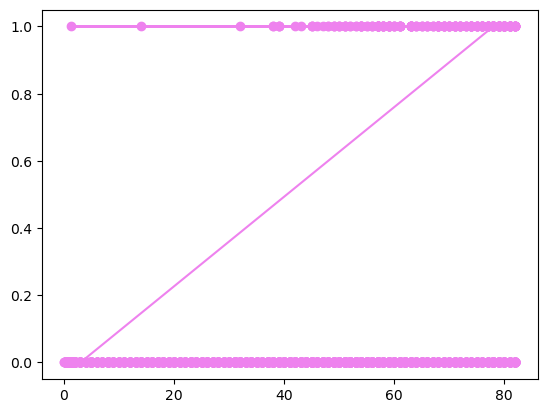

In [6]:
plt.plot(data1['age'], sdata['stroke'],marker='o', linestyle='-', color='violet', label='Stroke')

In [7]:
# find nulll values
data1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# mean bmi when person has stroke

meanbmi_stroke_1 = data1[data1['stroke']==1]['bmi'].mean()
meanbmi_stroke_1

30.47129186602871

In [9]:
# mean bmi when person has NO stroke

meanbmi_stroke_0 = data1[data1['stroke'] == 0]['bmi'].mean()
meanbmi_stroke_0

28.824430729942552

In [10]:
#fill null values in 'bmi' column

data1.loc[data1['stroke']==1,'bmi'] = data1.loc[data1['stroke']==1,'bmi'].fillna(meanbmi_stroke_1)
data1.loc[data1['stroke']==0,'bmi'] = data1.loc[data1['stroke']==0,'bmi'].fillna(meanbmi_stroke_0)
data1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [11]:
# Exporting 'data1' to a CSV file named 'data1.csv' for Tableu Visualization

data1.to_csv('data1.csv', index=False)

In [12]:
data1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
data1[['stroke','age']].groupby(['stroke']).count()

,age
stroke,
0,4860
1,249


In [14]:
stroke_data = data1.copy()
stroke_1 = data1[data1['stroke']==1]
stroke_0 = data1[data1['stroke']==0]

In [15]:
# Exporting 'stroke_1' and 'stroke_0' to a CSV file named for Tableu Visualization

stroke_1.to_csv('stroke_1.csv', index=False)
stroke_0.to_csv('stroke_0.csv', index=False)

In [16]:
stroke_1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [17]:
stroke_0.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


# Visualization

# PIE CHART

In [18]:
# pie chart

def pie_plot(column_name):
    column_count = stroke_data[column_name].value_counts()
    
    plt.figure(figsize =(5,5))
    plt.pie(column_count, labels=column_count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue','lightcoral'])
    plt.title(f' Pie chart of {column_name}')
    plt.axis('equal')
    
    plt.show()
    
# Compare pie charts for variables with and without stroke

import matplotlib.pyplot as plt

def pie_plot_compare(column_name):
    # Count the occurrences of each category in the 'column' for each group.
    no_stroke = stroke_0[column_name].value_counts()
    has_stroke = stroke_1[column_name].value_counts()
    #create labels
    labels_no_stroke = no_stroke.index.astype(str).tolist()
    labels_has_stroke = has_stroke.index.astype(str).tolist()
   
    # Create subplots for side-by-side pie charts.
    fig, axes = plt.subplots(1, 2, figsize=(8, 8))

    # Plot the pie chart for 'No Stroke' group.
    axes[0].pie(no_stroke, labels=labels_no_stroke, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('No Stroke')

    # Plot the pie chart for 'Has Stroke' group.
    axes[1].pie(has_stroke, labels=labels_has_stroke, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Has Stroke')

    # Adjust layout and display the plot.
    plt.tight_layout()
    plt.show()


# Gender

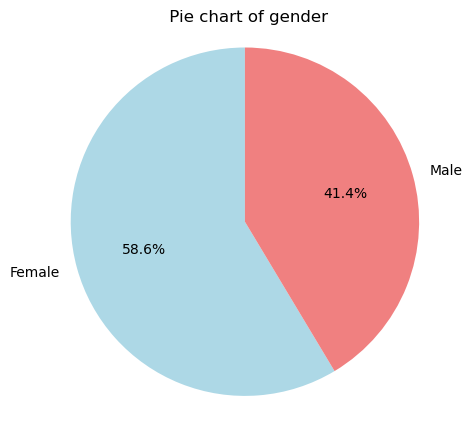

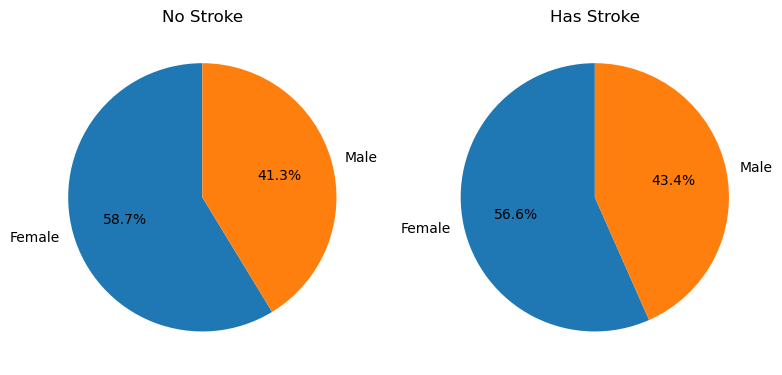

In [19]:
pie_plot("gender")
pie_plot_compare("gender")

# Stroke

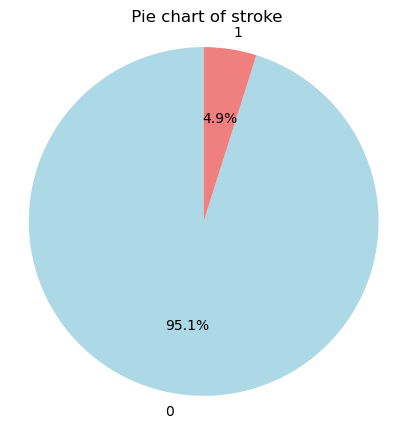

In [20]:
pie_plot('stroke')

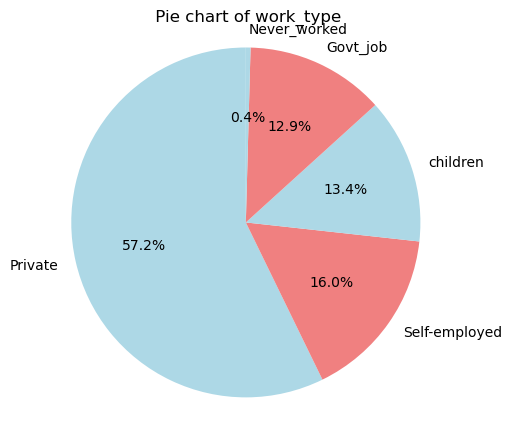

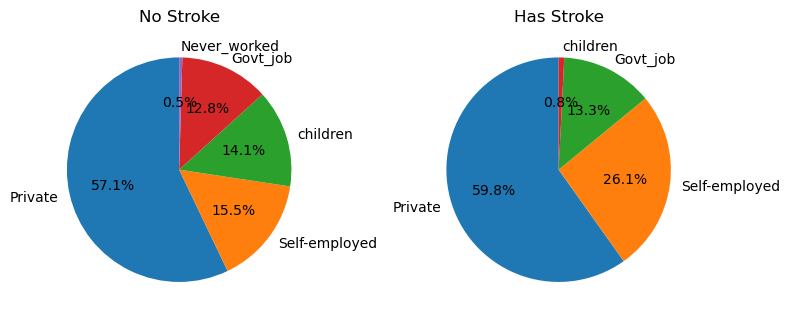

In [21]:
pie_plot("work_type")
pie_plot_compare("work_type")

# Histogram

In [22]:
# Histogram

def plot_hist(column_name, bins=6):
    column_count=[stroke_data[column_name]]
    plt.hist(column_count, bins=bins, color= 'magenta')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.show()
    
    
# Histogram to compare variables with and without stroke

def plot_hist_compare(column_name, bins=6):
    column_compare = [stroke_0[column_name], stroke_1[column_name]]
    plt.hist(column_compare, color = ['r','c'])
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(['No Stroke', 'Has Stroke'])
    plt.show()

# Body Mass Index (BMI)

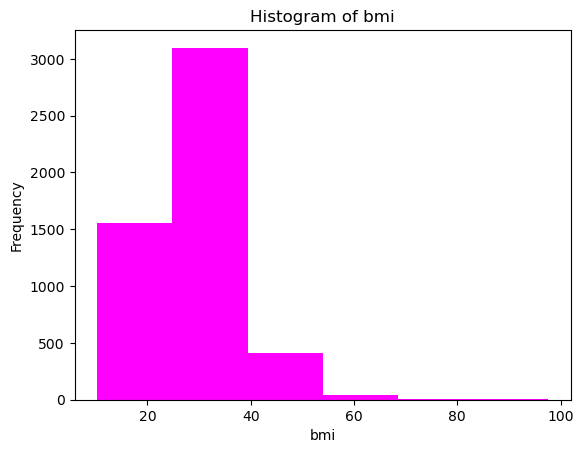

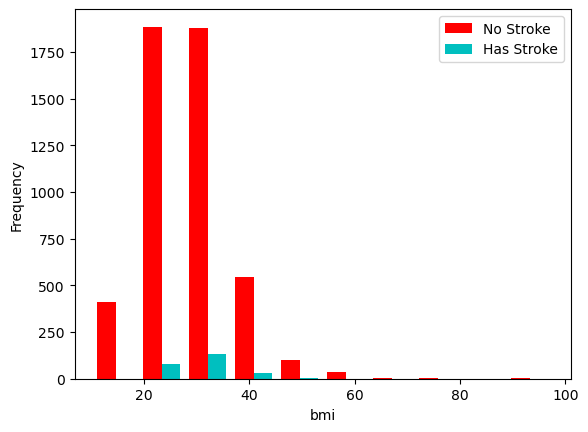

In [23]:
plot_hist('bmi')
plot_hist_compare('bmi')

# Age

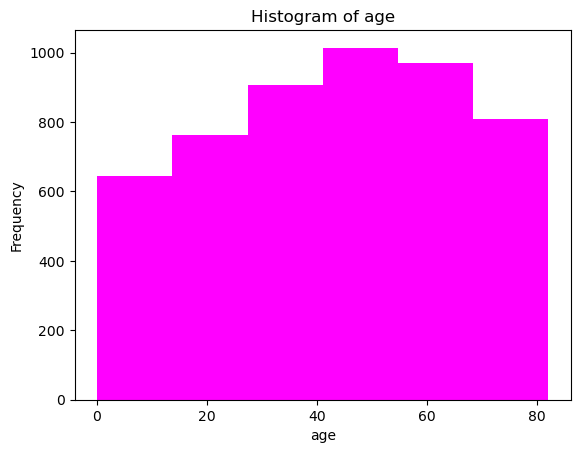

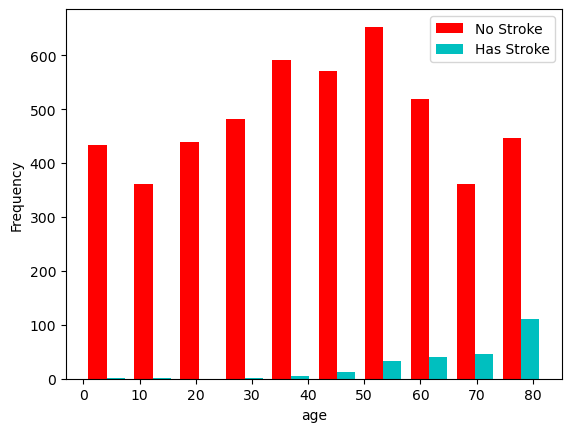

In [24]:
plot_hist('age')
plot_hist_compare('age')

# Hypertension

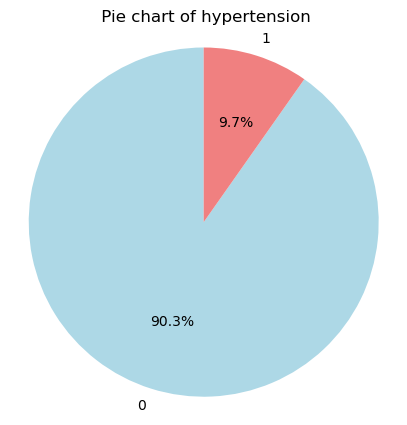

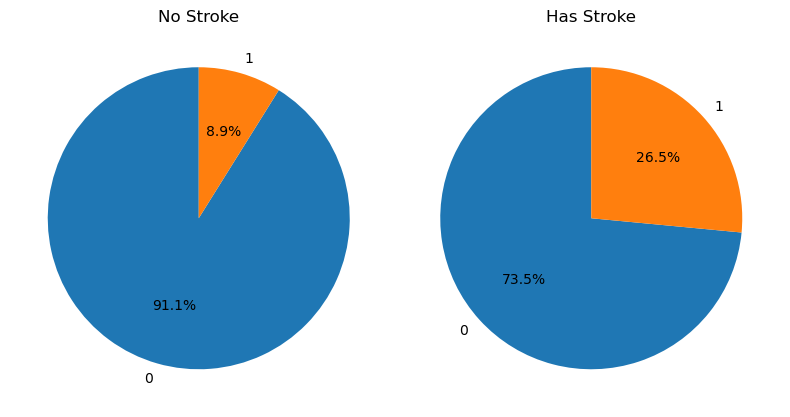

In [25]:
pie_plot('hypertension')
pie_plot_compare('hypertension')

# Heart disease

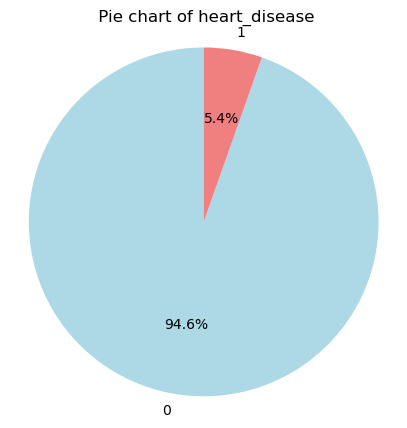

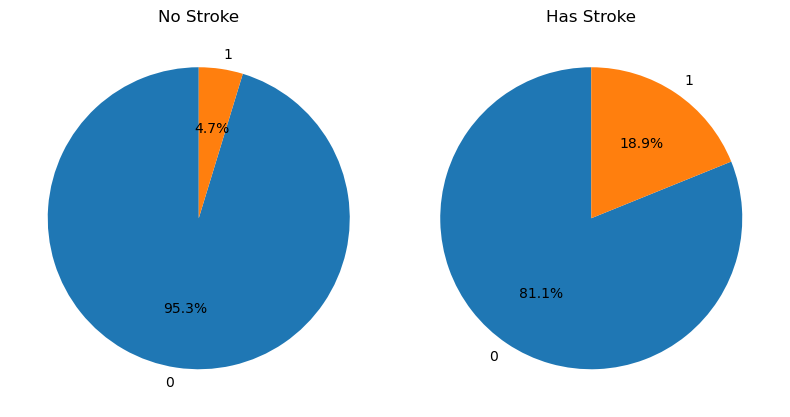

In [26]:
pie_plot('heart_disease')
pie_plot_compare('heart_disease')

# Marriage Status

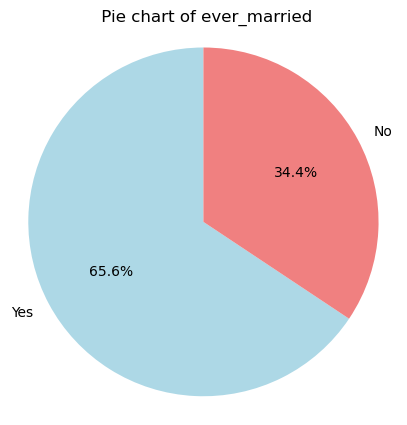

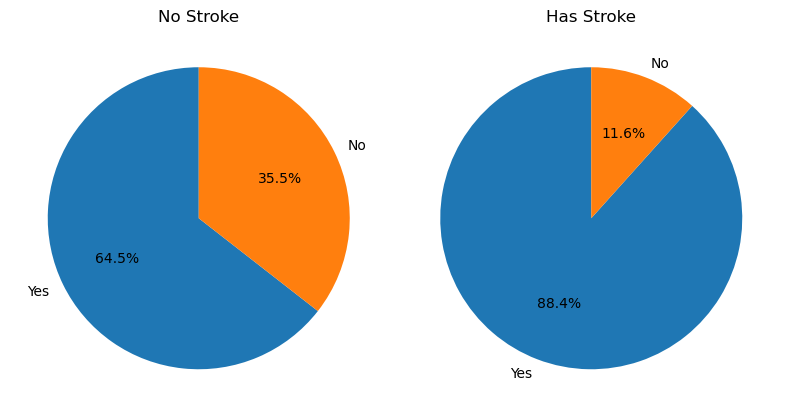

In [27]:
pie_plot('ever_married')
pie_plot_compare('ever_married')

# Residence Type	

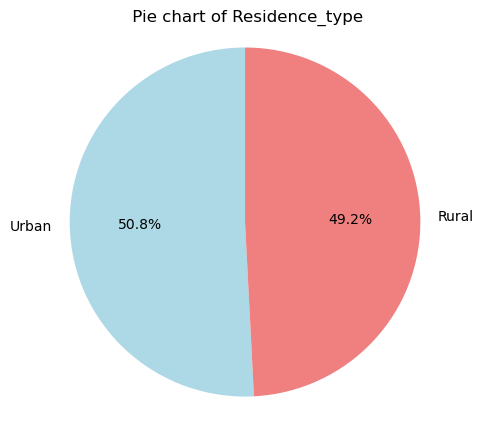

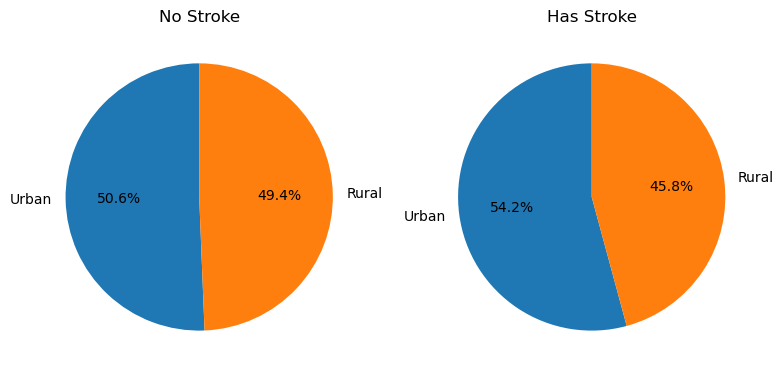

In [28]:
pie_plot('Residence_type')
pie_plot_compare('Residence_type')

# Average Glucose Level	

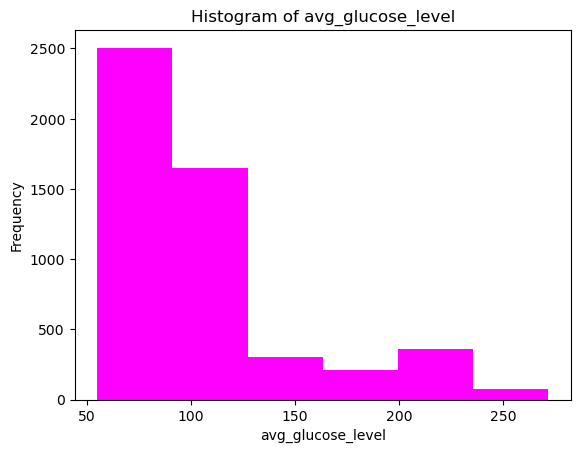

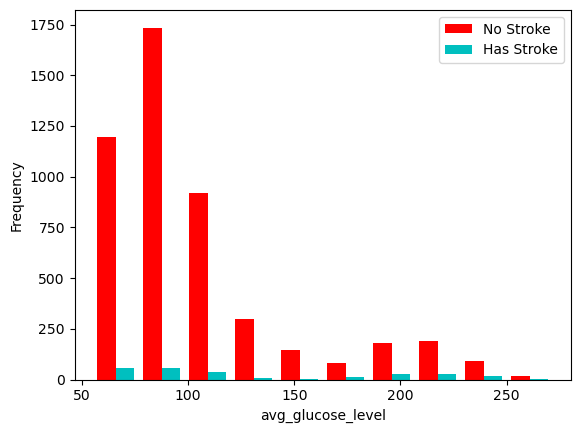

In [29]:
plot_hist('avg_glucose_level')
plot_hist_compare('avg_glucose_level')

# Smoking Status	

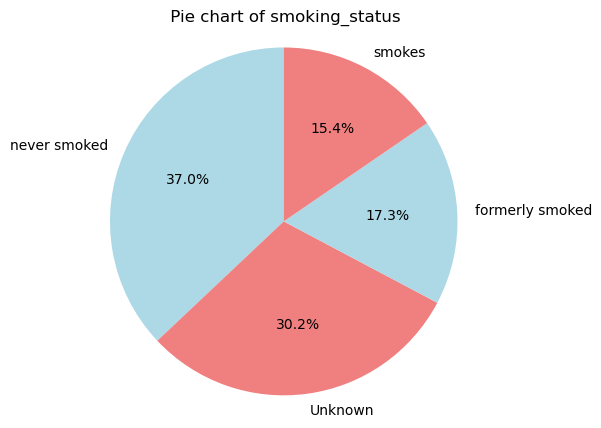

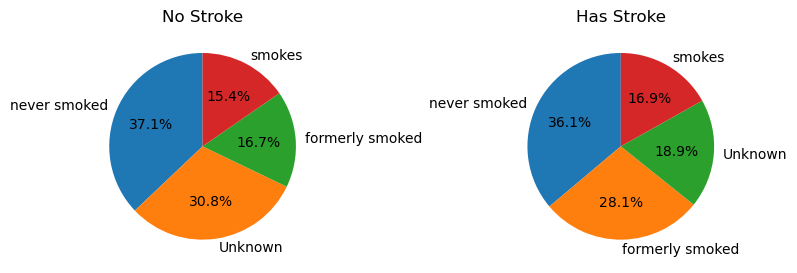

In [30]:
pie_plot('smoking_status')
pie_plot_compare('smoking_status')

In [31]:
30.8-18.9

11.900000000000002

# Box Plot - BMI


Median for no stroke is 28.3
Median for has stroke is 30.47129186602871


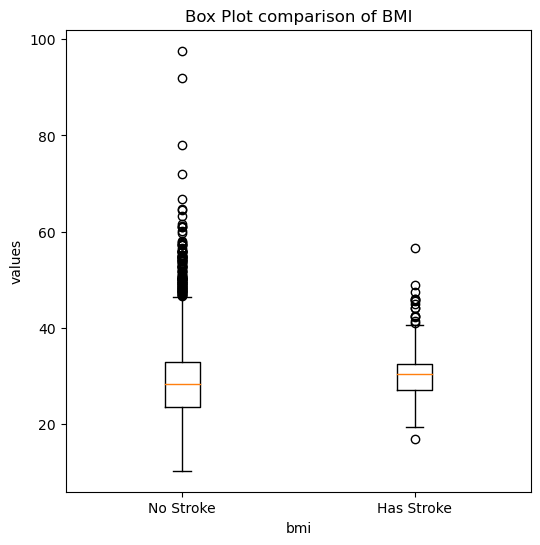

In [32]:
# Comparing boxplot of BMI

plt.figure(figsize=(6,6))
plt.boxplot([stroke_0['bmi'], stroke_1['bmi']])
plt.xticks([1, 2], ['No Stroke', 'Has Stroke'])
plt.title('Box Plot comparison of BMI')
plt.xlabel('bmi')
plt.ylabel('values')

print(f'Median for no stroke is {(stroke_0["bmi"]).median()}')
print(f'Median for has stroke is {(stroke_1["bmi"]).median()}')

# Box Plot - Average Glucose Level

Median for no stroke is 91.465
Median for has stroke is 105.22


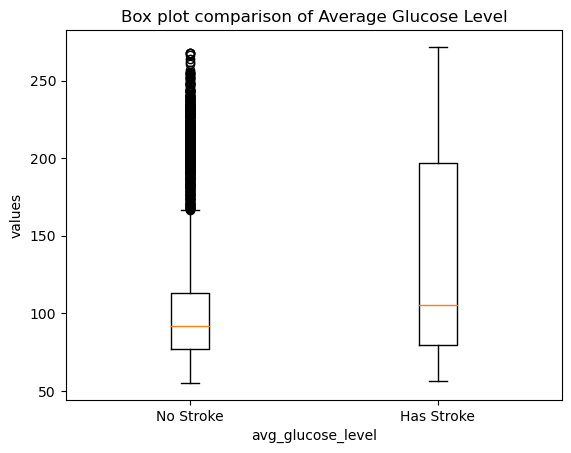

In [33]:
plt.boxplot([stroke_0['avg_glucose_level'], stroke_1['avg_glucose_level']])
plt.xticks([1,2], ['No Stroke', 'Has Stroke'])
plt.title('Box plot comparison of Average Glucose Level')
plt.xlabel('avg_glucose_level')
plt.ylabel('values')

print(f'Median for no stroke is {(stroke_0["avg_glucose_level"]).median()}')
print(f'Median for has stroke is {(stroke_1["avg_glucose_level"]).median()}')

# Box Plot - Age

Median for no stroke is 43.0
Median for has stroke is 71.0


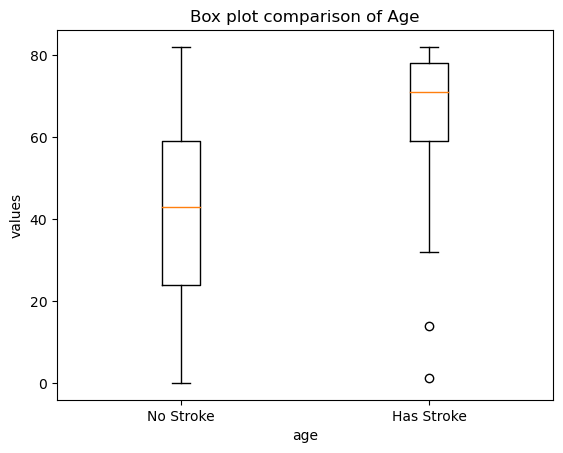

In [34]:
plt.boxplot([stroke_0['age'], stroke_1['age']])
plt.xticks([1,2], ['No Stroke', 'Has Stroke'])
plt.title('Box plot comparison of Age')
plt.xlabel('age')
plt.ylabel('values')

print(f'Median for no stroke is {(stroke_0["age"]).median()}')
print(f'Median for has stroke is {(stroke_1["age"]).median()}')

In [35]:
(stroke_0["age"]).median()

43.0

In [36]:
(stroke_1['age']).median()

71.0

# Data Visualization Result

| Parameter                 | No Stroke | Has Stroke | Note                                                             |
|---------------------------|-----------|------------|------------------------------------------------------------------|
| gender                    |           |            | No Clear Difference                                              |
| age (Median)              | 43        | 71         | The median age of stroke patients is higher than patients with no stroke |
| hypertension              |           |            | Patients with hypertension has 17.6% higher risk of getting stroke|
| heart_disease             |           |            | Patients who has heart disease has 14.2% higher risk of stroke|
| ever_married              |           |            | Patients who were married is 23.9% likely to get stroke thant those who don't|
| work_type                 |           |            | The patient who are self-employed are at 10.6% higher risk of having stroke|
| Residence_type (Most)     |           |            | No Clear Difference                                              |
| avg_glucose_level (Median)| 91.5      | 105.2      | The median of avg_glucose_level from Stroke Patient is higher than the Patient with no Stroke |
| bmi (Median)              | 28.3      | 30.5       | The median of bmi from Stroke Patient is slightly higher than the patient with no Stroke |
| smoking_status (Most)     |           |            | The patient who smokes or formerly smoked has 12.9% likely to have stroke|


In [37]:
# Drop columns 'gender'

column_drop = ['gender']
data1 = data1.drop(columns = column_drop, axis = 1)
data1.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1
2,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [38]:
# Drop columns 'Residence_type'

column_drop = ['Residence_type']
data1 = data1.drop(columns = column_drop, axis = 1)
data1.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,36.600000,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,202.21,30.471292,never smoked,1
2,80.0,0,1,Yes,Private,105.92,32.500000,never smoked,1
3,49.0,0,0,Yes,Private,171.23,34.400000,smokes,1
4,79.0,1,0,Yes,Self-employed,174.12,24.000000,never smoked,1


In [39]:
# Label Encoding 'ever_married'

from sklearn.preprocessing import LabelEncoder
#create label encoder
label_encoder = LabelEncoder()

# Apply LabelEncoding to "ever_married" column
data1['ever_married'] = label_encoder.fit_transform(data1['ever_married'])

data1.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,Private,228.69,36.600000,formerly smoked,1
1,61.0,0,0,1,Self-employed,202.21,30.471292,never smoked,1
2,80.0,0,1,1,Private,105.92,32.500000,never smoked,1
3,49.0,0,0,1,Private,171.23,34.400000,smokes,1
4,79.0,1,0,1,Self-employed,174.12,24.000000,never smoked,1


In [40]:
data1['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [41]:
# Performing One-hot encoding in the 'smoking_status' & 'work_type' column 
smoking_status_encoded = pd.get_dummies(data1['smoking_status'], prefix='smoking')
work_type_encoded = pd.get_dummies(data1['work_type'], prefix='work_type')

# Concatenate the encoded columns to the original DataFrame
data_encoded = pd.concat([data1, smoking_status_encoded, work_type_encoded], axis=1)

# Drop'smoking_status' column
data_encoded = data_encoded.drop(['smoking_status', 'work_type'], axis=1)

data_encoded.head() 

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,0,1,1,228.69,36.600000,1,0,1,0,0,0,0,1,0,0
1,61.0,0,0,1,202.21,30.471292,1,0,0,1,0,0,0,0,1,0
2,80.0,0,1,1,105.92,32.500000,1,0,0,1,0,0,0,1,0,0
3,49.0,0,0,1,171.23,34.400000,1,0,0,0,1,0,0,1,0,0
4,79.0,1,0,1,174.12,24.000000,1,0,0,1,0,0,0,0,1,0


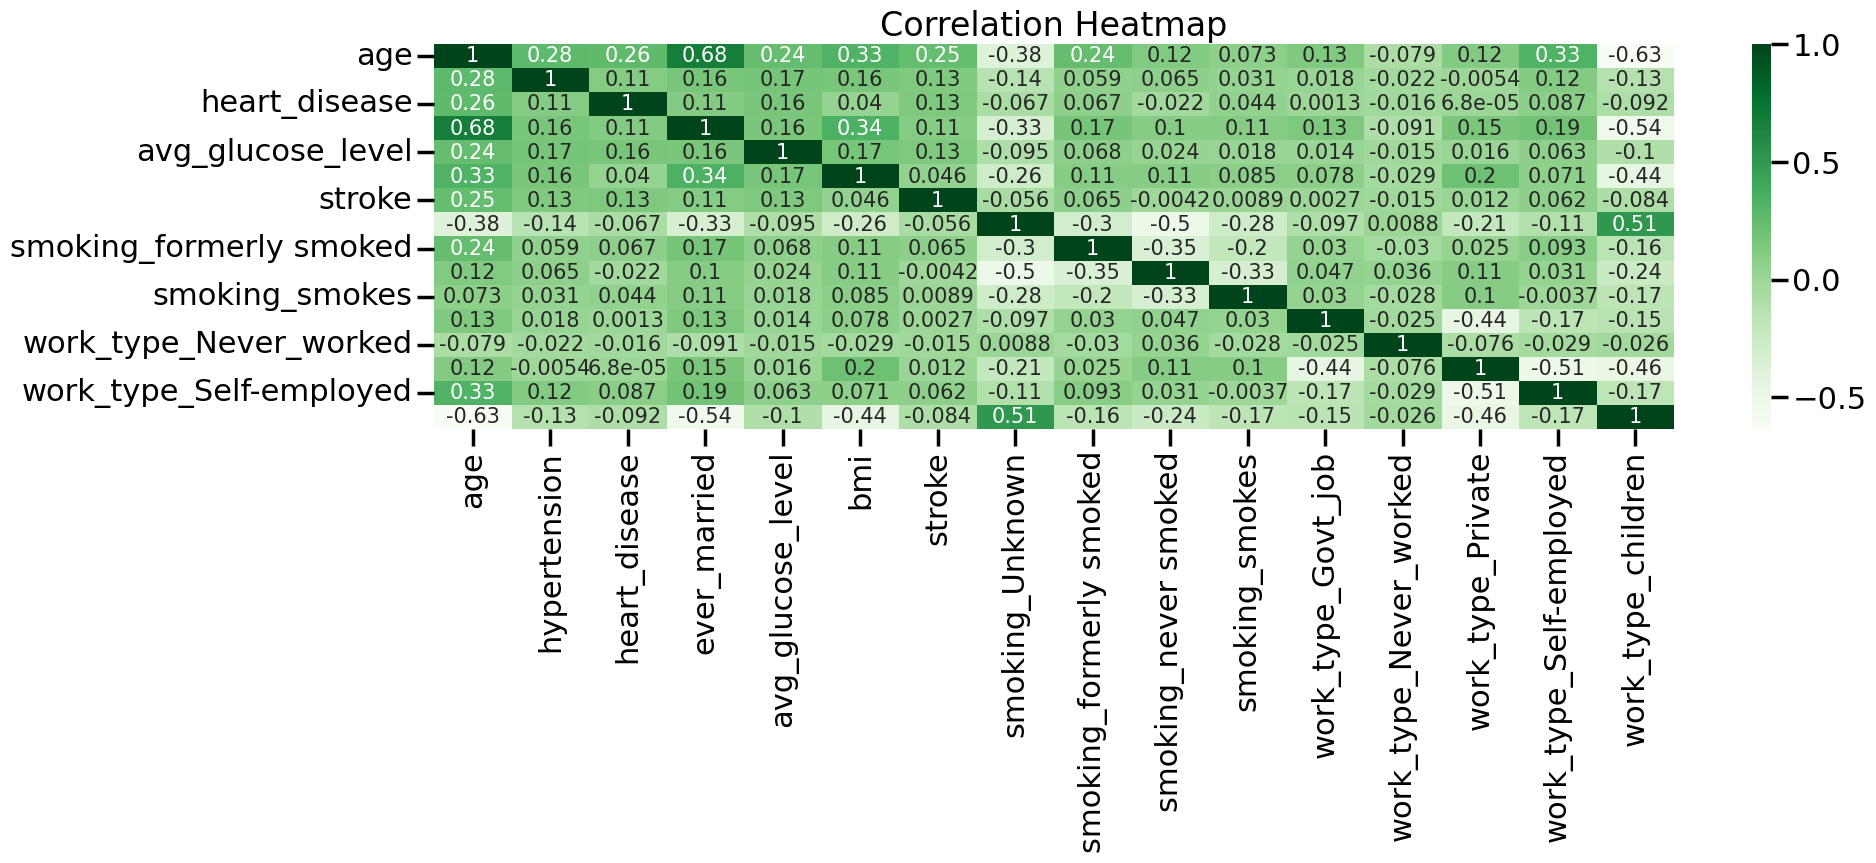

In [123]:
#Visualization of Correlations
fig = plt.figure(figsize=(20,5))
sns.heatmap(data_encoded.corr(),annot_kws={"size": 15}, annot=True,cmap="Greens")
plt.title('Correlation Heatmap')
plt.show()

In [43]:
print(data_encoded.corr())

                              age  hypertension  heart_disease  ever_married  \
age                      1.000000      0.276367       0.263777      0.679084   
hypertension             0.276367      1.000000       0.108292      0.164187   
heart_disease            0.263777      0.108292       1.000000      0.114601   
ever_married             0.679084      0.164187       0.114601      1.000000   
avg_glucose_level        0.238323      0.174540       0.161907      0.155329   
bmi                      0.327488      0.160256       0.039581      0.336128   
stroke                   0.245239      0.127891       0.134905      0.108299   
smoking_Unknown         -0.378366     -0.141551      -0.066765     -0.332335   
smoking_formerly smoked  0.237347      0.059022       0.066938      0.171960   
smoking_never smoked     0.119207      0.065018      -0.021893      0.102663   
smoking_smokes           0.073075      0.031213       0.044030      0.105132   
work_type_Govt_job       0.129965      0

# Resampled Data

In [95]:
from sklearn.utils import resample

#storing encoded data in a new variable 'sample'
sample = data_encoded


# Separate minority and majority classes
minority_class = sample[sample['stroke'] == 1]
majority_class = sample[sample['stroke'] == 0]

# Calculate the size of the minority class
minority_size = len(minority_class)

# Randomly sample an equal number of observations from the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=minority_size, random_state=42)

# Combine the sampled observations from both classes
balanced_data = pd.concat([minority_class, majority_downsampled])

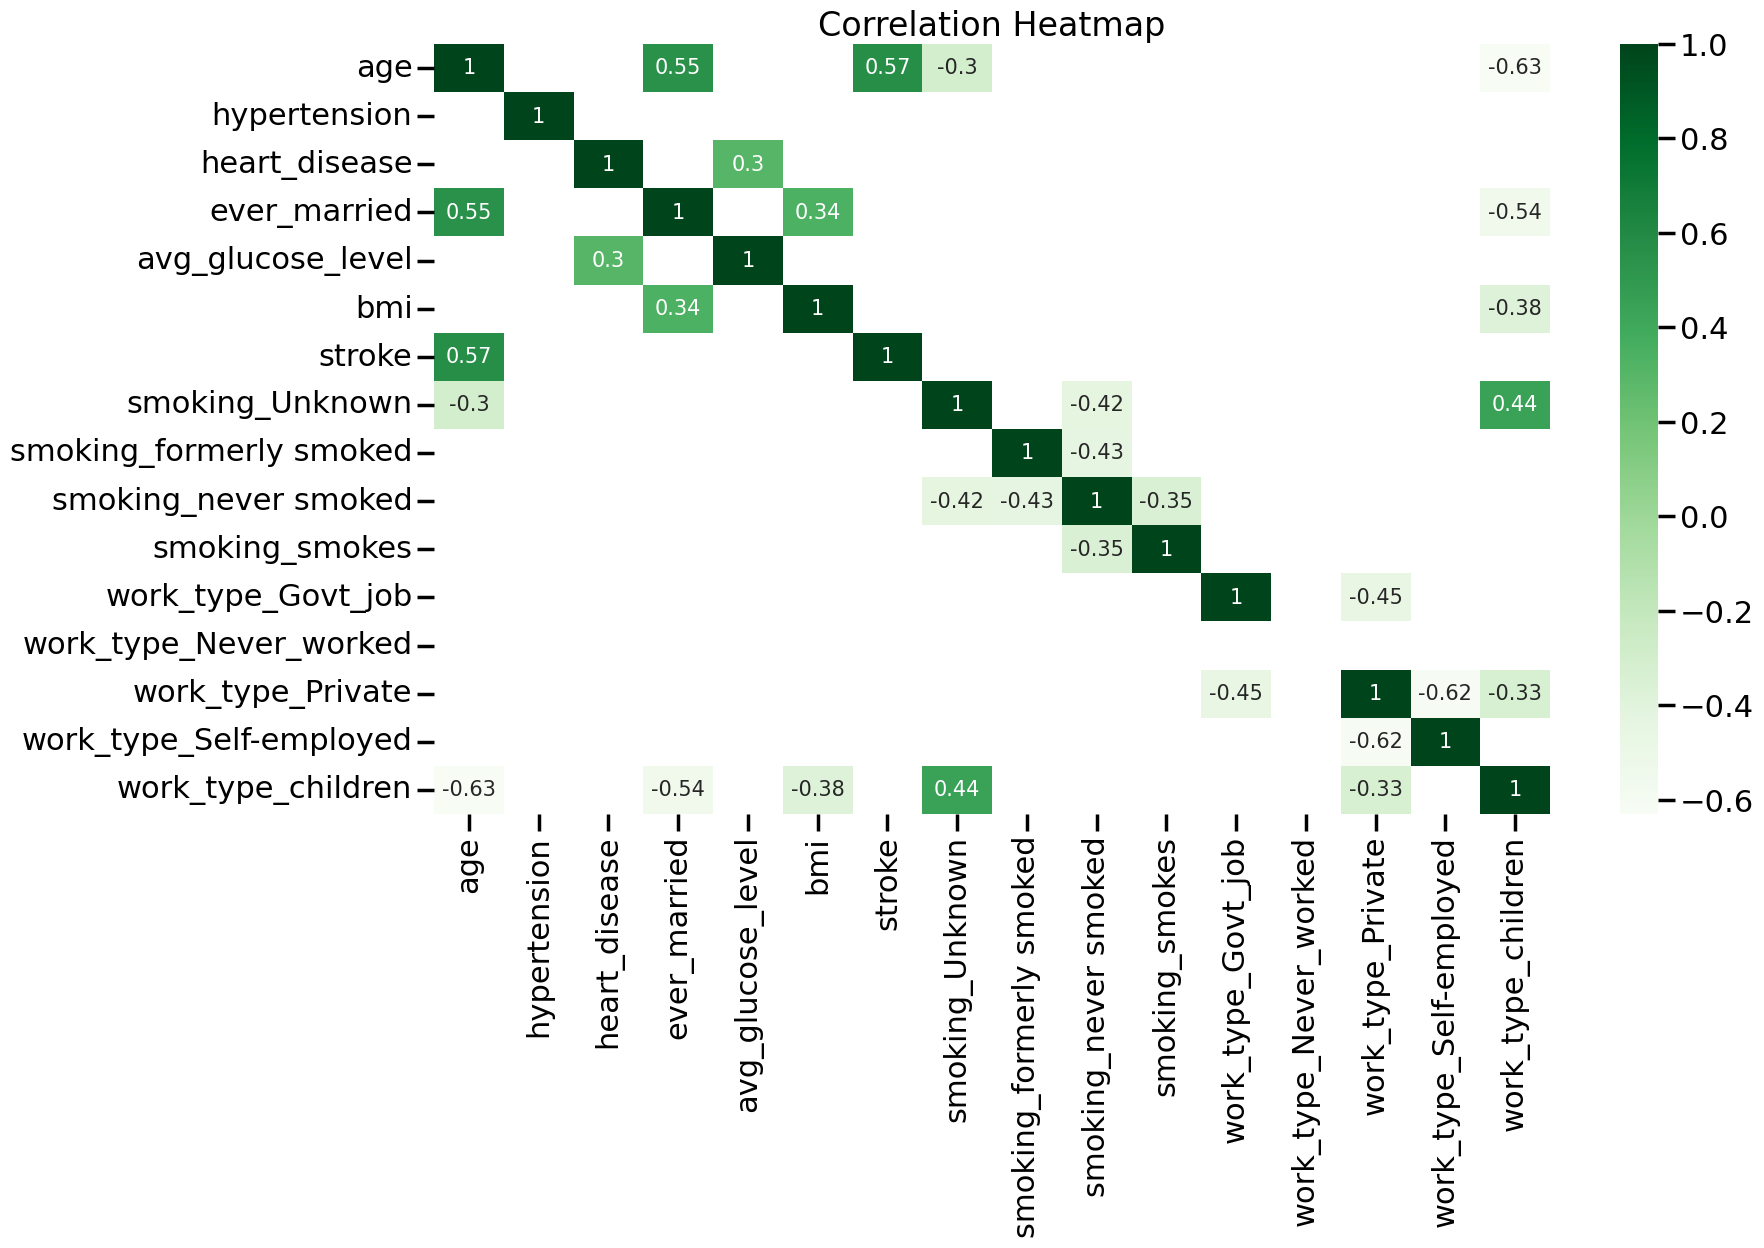

In [125]:
#Visualization of Correlations

# Calculate correlations above the threshold
corr_matrix = balanced_data.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.3]

fig = plt.figure(figsize=(18,10))
sns.heatmap(high_corr, annot_kws={"size": 15}, annot=True,cmap="Greens")
plt.title('Correlation Heatmap')
plt.show()

In [96]:
balanced_data.shape

(498, 16)

In [97]:
# Define x and y variables_2
X= balanced_data.drop('stroke', axis=1).to_numpy()
y = balanced_data['stroke'].to_numpy()

# Create training and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=100)

# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_3 = sc.fit_transform(x_train)
X_test_3 = sc.transform(x_test)

# Logistical Regression

In [153]:
#Script for Logistical Regression_2
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=100)
logreg.fit(X_train_3, y_train)
y_pred = logreg.predict(X_test_3)

# Print confusion matrix and classification report
print('\nEstimator: Logistic Regression')
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred, zero_division=1))


Estimator: Logistic Regression
[[36 14]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        50
           1       0.75      0.82      0.78        50

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



# ROC and PR_curve

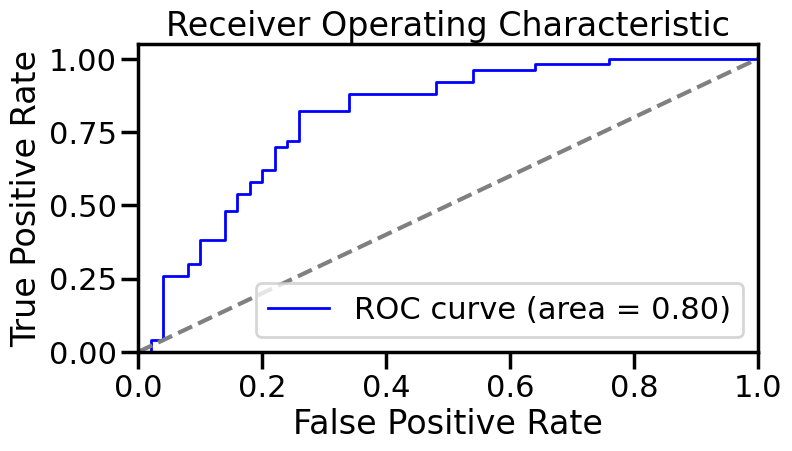

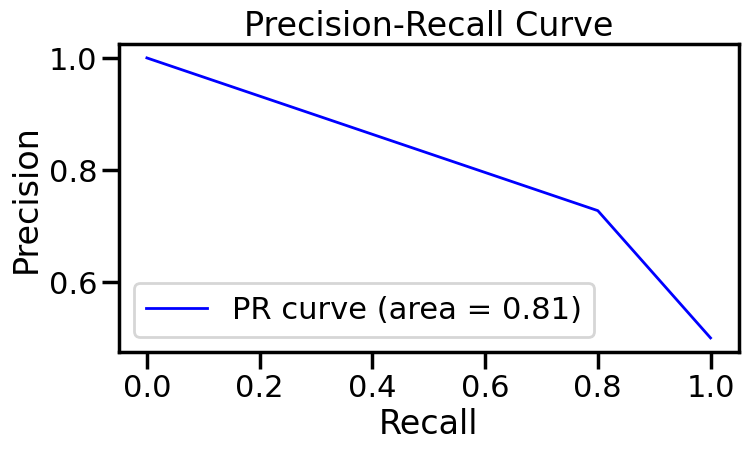

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Calculate ROC curve and AUC for Logistic Regression model
y_pred_prob = logreg.predict_proba(X_test_3)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate Precision-Recall curve and AUC for Logistic Regression model
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 4))
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Learning Curve

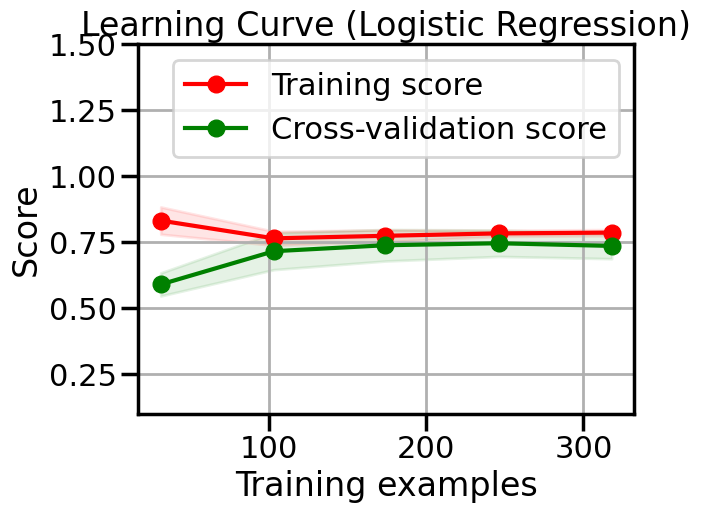

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve for logistic regression
plot_learning_curve(logreg, "Learning Curve (Logistic Regression)", X_train_3, y_train, ylim=(0.1, 1.5), cv=5, n_jobs=-1)

plt.show()

# Ensemble Models - VotingClassifier

In [165]:
# VotingClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score


# Create Ensemble Voting Model with Logistic Regression and Bagging
voting_classifier = VotingClassifier(estimators=[('logreg', logreg)], voting='soft')
voting_classifier.fit(X_train_3, y_train)
voting_predictions = voting_classifier.predict(X_test_3)

# Calculate recall score
voting_recall = recall_score(y_test, voting_predictions, average='weighted')

# Print Classification Report for the Bagging Classifier
print("Ensemble Voting with Voting Classifier Classification Report:")
voting_classification_report = classification_report(y_test, voting_predictions)
print(voting_classification_report)

Ensemble Voting with Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        50
           1       0.75      0.82      0.78        50

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



In [171]:
# VotingClassifier

logreg = LogisticRegression(random_state=100)
rf_classifier = RandomForestClassifier(random_state=100)

# Create a Voting Classifier with soft voting
voting_classifier = VotingClassifier(estimators=[('logreg', logreg), ('rf', rf_classifier)], voting='soft')

# Fit the Voting Classifier
voting_classifier.fit(X_train_3, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test_3)

# Evaluate the model
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred))

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        50
           1       0.74      0.80      0.77        50

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



# GradientBoostingClassifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

# Train the model
gb.fit(X_train_3, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test_3)

# Print confusion matrix and classification report
print('\nEstimator: GradientBoostingClassifier')
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred, zero_division=1))


Estimator: GradientBoostingClassifier
[[35 15]
 [11 39]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        50
           1       0.72      0.78      0.75        50

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



# Support Vector Classification

In [109]:
# Create a Support Vector Classification model

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_3, y_train)
y_pred = svc.predict(X_test_3)

# Print confusion matrix and classification report
print('\nEstimator: Support Vector Classification')
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred, zero_division=1))


Estimator: Support Vector Classification
[[37 13]
 [10 40]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.75      0.80      0.78        50

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



# Random Forest Classification

In [114]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=100)
rf.fit(X_train_3, y_train)
y_pred = rf.predict(X_test_3)

# Print confusion matrix and classification report
print('\nEstimator: Support Vector Classification')
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred, zero_division=1))


Estimator: Support Vector Classification
[[35 15]
 [10 40]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        50
           1       0.73      0.80      0.76        50

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100

